Make decison tree to train the data for job interview to hire a person

First we'll load some fake data on past hires I made up. Note how we use pandas to convert a csv file into a DataFrame:

In [1]:
%clear
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "./PastHires.csv"
df = pd.read_csv(input_file, header = 0)

In [2]:
print(df.head())


   Years Experience Employed?  Previous employers Level of Education  \
0                10         Y                   4                 BS   
1                 0         N                   0                 BS   
2                 7         N                   6                 BS   
3                 2         Y                   1                 MS   
4                20         N                   2                PhD   

  Top-tier school Interned Hired  
0               N        N     Y  
1               Y        Y     Y  
2               N        N     N  
3               Y        N     Y  
4               Y        N     N  


In [3]:
print(df.tail())

    Years Experience Employed?  Previous employers Level of Education  \
8                 15         Y                   5                 BS   
9                  0         N                   0                 BS   
10                 1         N                   1                PhD   
11                 4         Y                   1                 BS   
12                 0         N                   0                PhD   

   Top-tier school Interned Hired  
8                N        N     Y  
9                N        N     N  
10               Y        N     N  
11               N        Y     Y  
12               Y        N     Y  


In [4]:
df.describe()

,Years Experience,Previous employers
count,13.000000,13.000000
mean,5.153846,1.769231
std,6.348834,2.006400
min,0.000000,0.000000
25%,0.000000,0.000000
50%,3.000000,1.000000
75%,7.000000,2.000000
max,20.000000,6.000000


In [5]:
print(df.shape)
print(df.size)
print(len(df))
print(df.columns)
print(df['Hired'])
print(df['Hired'][:5])
print(df['Hired'][5:])
print(df['Hired'][4])

(13, 7)
91
13
Index(['Years Experience', 'Employed?', 'Previous employers',
       'Level of Education', 'Top-tier school', 'Interned', 'Hired'],
      dtype='object')
0     Y
1     Y
2     N
3     Y
4     N
5     Y
6     Y
7     Y
8     Y
9     N
10    N
11    Y
12    Y
Name: Hired, dtype: object
0    Y
1    Y
2    N
3    Y
4    N
Name: Hired, dtype: object
5     Y
6     Y
7     Y
8     Y
9     N
10    N
11    Y
12    Y
Name: Hired, dtype: object
N


In [6]:
print(df[['Years Experience', 'Hired', 'Employed?']])

    Years Experience Hired Employed?
0                 10     Y         Y
1                  0     Y         N
2                  7     N         N
3                  2     Y         Y
4                 20     N         N
5                  0     Y         N
6                  5     Y         Y
7                  3     Y         N
8                 15     Y         Y
9                  0     N         N
10                 1     N         N
11                 4     Y         Y
12                 0     Y         N


In [7]:
df.sort_values(['Years Experience'])

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
1,0,N,0,BS,Y,Y,Y
5,0,N,0,PhD,Y,Y,Y
9,0,N,0,BS,N,N,N
12,0,N,0,PhD,Y,N,Y
10,1,N,1,PhD,Y,N,N
3,2,Y,1,MS,Y,N,Y
7,3,N,1,BS,N,Y,Y
11,4,Y,1,BS,N,Y,Y
6,5,Y,2,MS,N,Y,Y
2,7,N,6,BS,N,N,N


In [8]:
degree_counts = df['Level of Education'].value_counts()
degree_counts

BS     7
PhD    4
MS     2
Name: Level of Education, dtype: int64

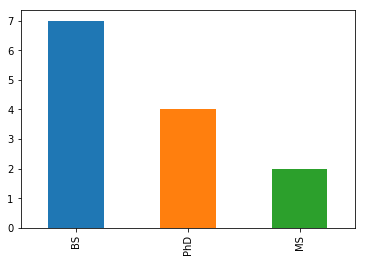

In [9]:
degree_counts.plot(kind='bar')

In [10]:
dPeH = df[['Hired', 'Previous employers']][5:11]
dPeH

,Hired,Previous employers
5,Y,0
6,Y,2
7,Y,1
8,Y,5
9,N,0
10,N,1


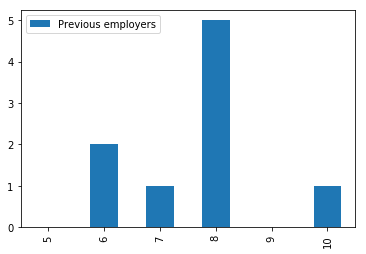

In [11]:
dPeH.plot(kind='bar')

map string to integer for data manipulation

In [12]:
print(df)

    Years Experience Employed?  Previous employers Level of Education  \
0                 10         Y                   4                 BS   
1                  0         N                   0                 BS   
2                  7         N                   6                 BS   
3                  2         Y                   1                 MS   
4                 20         N                   2                PhD   
5                  0         N                   0                PhD   
6                  5         Y                   2                 MS   
7                  3         N                   1                 BS   
8                 15         Y                   5                 BS   
9                  0         N                   0                 BS   
10                 1         N                   1                PhD   
11                 4         Y                   1                 BS   
12                 0         N                   0 

In [13]:
d = {'Y':1, 'N':0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Interned'] = df['Interned'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
d = {'BS':0, 'MS':1,'PhD':2}
df['Level of Education'] = df['Level of Education'].map(d)
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0
5,0,0,0,2,1,1,1
6,5,1,2,1,0,1,1
7,3,0,1,0,0,1,1
8,15,1,5,0,0,0,1
9,0,0,0,0,0,0,0


Now we want to build a decision tree

In [14]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

Now make the decision tree to hire a person from the resume

In [15]:
y = df["Hired"]
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

decision tree will take you from left to right for true or false conditions.

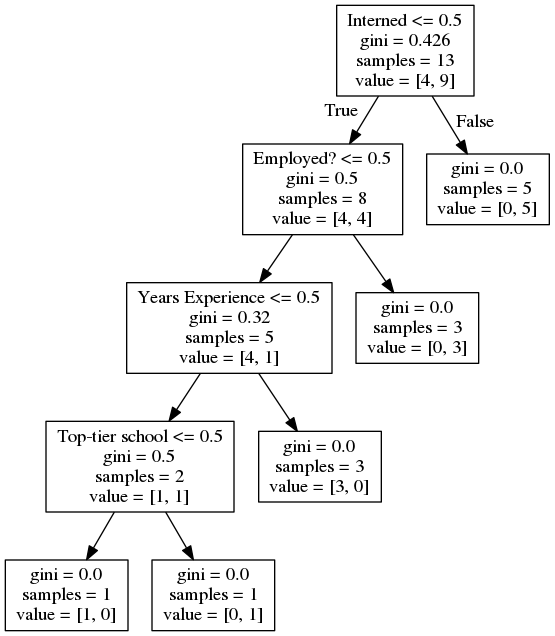

In [16]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

###Use random forest for ensemble learning

use random forest from decision trees to speculate whether or not candidate offer for the job

In [17]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

#candidate profile
print ('1=Hire the person, 0=Donot hire:',clf.predict([[10, 1, 4, 0, 0, 0]]))
print ('1=Hire the person, 0=Donot hire:',clf.predict([[10, 0, 4, 0, 0, 0]]))
print ('1=Hire the person, 0=Donot hire:',clf.predict([[1, 0, 4, 0, 0, 0]]))
print ('1=Hire the person, 0=Donot hire:',clf.predict([[0, 1, 4, 0, 0, 0]]))

1=Hire the person, 0=Donot hire: [1]
1=Hire the person, 0=Donot hire: [0]
1=Hire the person, 0=Donot hire: [0]
1=Hire the person, 0=Donot hire: [1]
